In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#3. tiến hành EDA đánh index cho các biến trong tập dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [5]:
#3.2 Danh sách các cột
columns_eda=df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

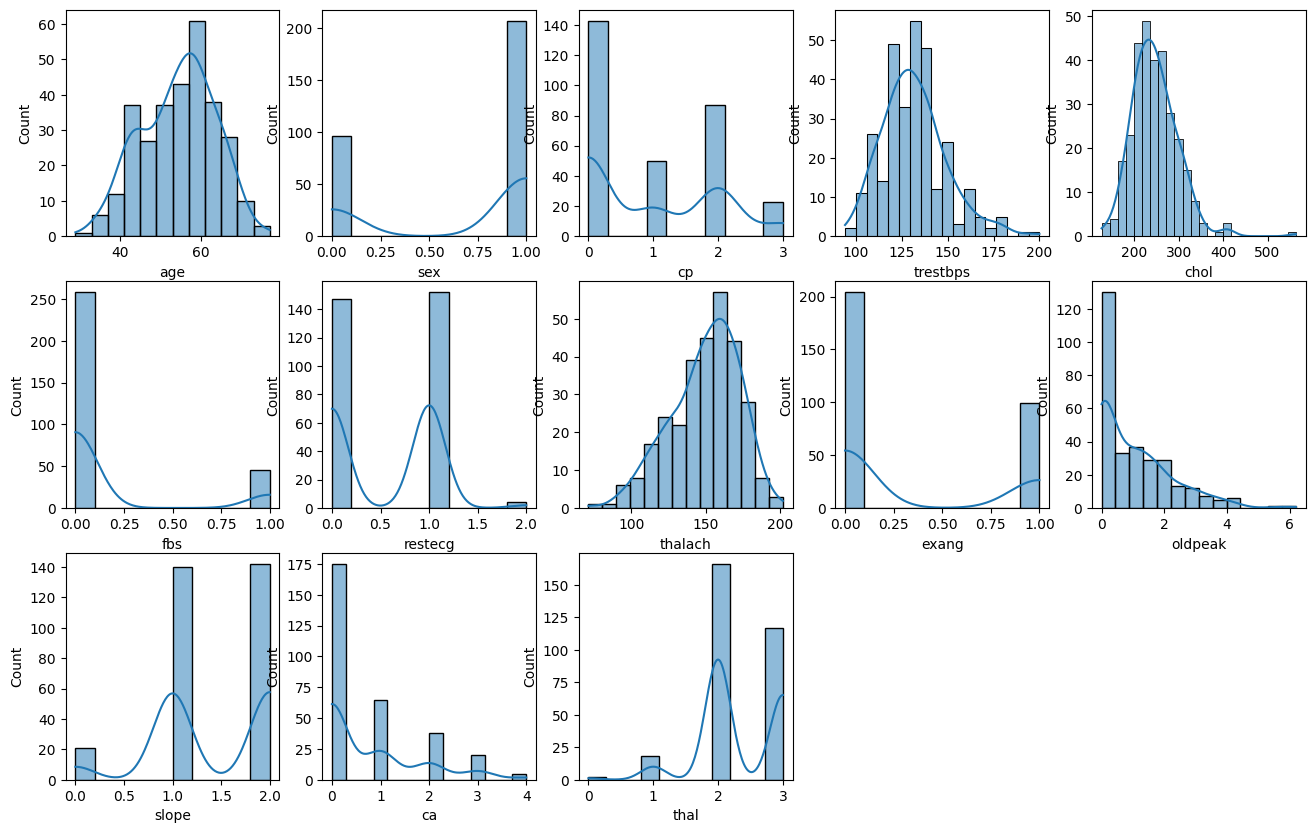

In [9]:
#3.3 Phân phối của các biến số input
fig=plt.figure(figsize=(16, 10))
for i in range(len(columns_eda)):
    colname=columns_eda[i]
    sub=fig.add_subplot(3, 5, i+1)
    sns.histplot(data=df, x=colname,kde=True)


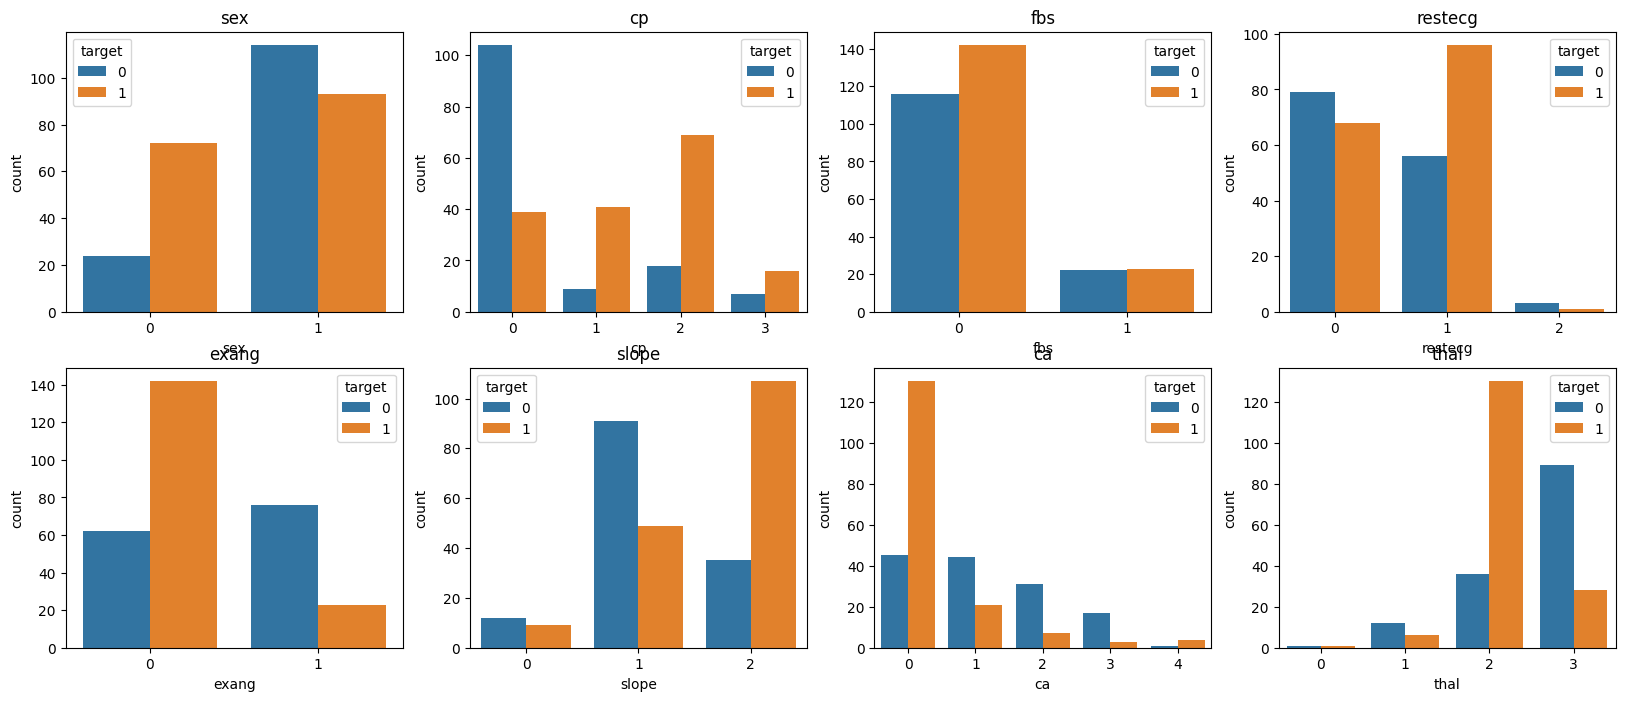

In [10]:
#3.4 Đếm xem số lượng các biên input theo biến mục tiêu
categories_list=['sex','cp','fbs','restecg','exang','slope','ca','thal']
fig=plt.figure(figsize=(20, 8))
for i in range(len(categories_list)):
    colname=categories_list[i]
    sub=fig.add_subplot(2, 4, i+1)
    sns.countplot(data=df, x=colname, hue='target')
    sub.set_title(colname)

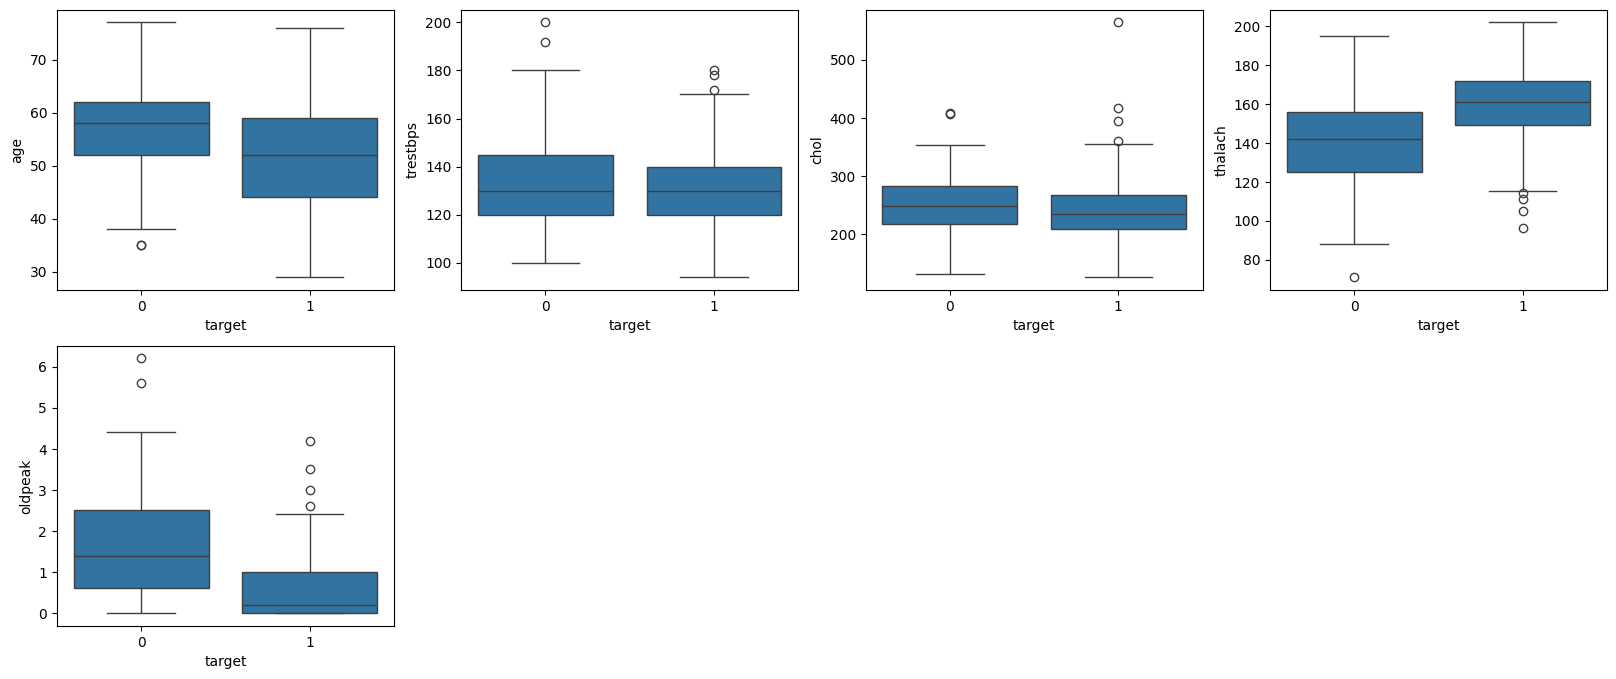

In [13]:
#3.5 Phân tích biêu đồ box-plot các biến input (nhóm đinh lượng) theo biến mục tiêu
numeric_list=['age','trestbps','chol','thalach','oldpeak']
fig=plt.figure(figsize=(20, 8))
for i in range(len(numeric_list)):
    colname=numeric_list[i]
    sub=fig.add_subplot(2, 4, i+1)
    sns.boxplot(data=df, x='target', y=colname)
    

In [14]:
#4.1 chuẩn bị dữ liệu
x=df.iloc[:,:-1].values
y=df[['target']].values
x=x.astype(float)
y=y.astype(float)

In [15]:
#4.2 Phân chia tập dữ liệu thành tập train và test tỉ lệ 80/20 và hệ số random là 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test,indices_train,indices_test = train_test_split(x, y,df, test_size=0.2, random_state=42)

In [17]:
#4.3 Hiển thị danh sách 5 dòng  cuối cung tron tập x_test và y_test
print("x_test:\n", x_test[:5])
print("y_test:\n", y_test[:5])

x_test:
 [[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
y_test:
 [[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [18]:
#4.4 hiển thị danh sách index  của các sample trong tập x_train , x_test
print("Indices train:\n", indices_train)
print("Indices test:\n", indices_test)

Indices train:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  target  
132      2   0     2       1  
202      

In [19]:
#4.5 Huấn luyện mô hình 
knnModel = KNeighborsClassifier(n_neighbors=5,algorithm="brute",metric="minkowski")
knnModel.fit(x_train, y_train)

c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [20]:
#4.6 đánh giá mô hinh trên tập dữ liệu train và test bằng độ đo accuracy
print("Train accuracy:", knnModel.score(x_train, y_train))
print("Test accuracy:", knnModel.score(x_test, y_test))

Train accuracy: 0.7603305785123967
Test accuracy: 0.6885245901639344


Number of parameter candidates: 20


c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

19/19: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
Results:
 [[{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3}, 0.7727272727272727, 0.6557377049180327], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4}, 0.743801652892562, 0.6721311475409836], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5}, 0.7603305785123967, 0.6885245901639344], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6}, 0.7520661157024794, 0.7213114754098361], [{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082], [{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3}, 0.7727272727272727, 0.6557377049180327], [{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4}, 0.743801652892562, 0.6721311475409

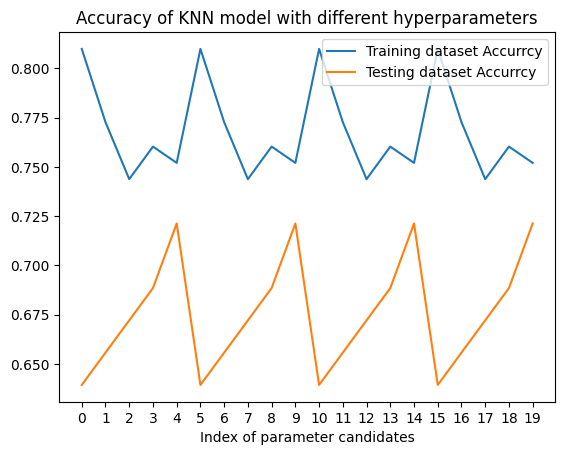

In [22]:
#5.1 sử dụng grid search với nhiều hyperparameter 
from sklearn.model_selection import ParameterGrid
estimator = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(2,7),
    'algorithm': ["ball_tree", "kd_tree"],
    'metric': ["euclidean","minkowski"]
}
param_cadidate = ParameterGrid(param_grid)
print(f'Number of parameter candidates: {len(param_cadidate)}')
results = []
for i,params in enumerate(param_cadidate):
    model=estimator.set_params(**params)
    model.fit(x_train, y_train)
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    results.append([params,score_train, score_test])
print(f'{i}/{len(param_cadidate)-1}:',params,score_train,score_test)
print("Results:\n", results)

print(f'Max score on train: {max(results, key=lambda x: x[1])}')
print(f'Max score on test: {max(results, key=lambda x: x[2])}')
#5.2 sử dụng grid search với cross validation
list_index_on_results = range(len(results))
list_score_on_train=[x[1]for x in results]
print("List of scores on train:", list_score_on_train)
list_score_on_test=[x[2]for x in results]
print("List of scores on test:", list_score_on_test)
#5.3 vẽ biểu đồ thể hiện độ chính xác của mô hình trên tập train và test
plt.plot(list_index_on_results, list_score_on_train, label='Training dataset Accurrcy')
plt.plot(list_index_on_results, list_score_on_test, label='Testing dataset Accurrcy')
plt.legend()
plt.xlabel('Index of parameter candidates')
plt.xticks(range(len(results)),range(len(results)))
plt.title('Accuracy of KNN model with different hyperparameters')
plt.show()

c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

k=1, train accuracy=1.0, test accuracy=0.6229508196721312
k=2, train accuracy=0.8099173553719008, test accuracy=0.639344262295082
k=3, train accuracy=0.7727272727272727, test accuracy=0.6557377049180327
k=4, train accuracy=0.743801652892562, test accuracy=0.6721311475409836
k=5, train accuracy=0.7603305785123967, test accuracy=0.6885245901639344
k=6, train accuracy=0.7520661157024794, test accuracy=0.7213114754098361
k=7, train accuracy=0.743801652892562, test accuracy=0.7049180327868853
k=8, train accuracy=0.7231404958677686, test accuracy=0.6885245901639344
k=9, train accuracy=0.71900826446281, test accuracy=0.6885245901639344
k=10, train accuracy=0.6942148760330579, test accuracy=0.7049180327868853
k=11, train accuracy=0.7272727272727273, test accuracy=0.7540983606557377
k=12, train accuracy=0.6983471074380165, test accuracy=0.7377049180327869
k=13, train accuracy=0.6900826446280992, test accuracy=0.7377049180327869
k=14, train accuracy=0.6942148760330579, test accuracy=0.7377049180

c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: Data

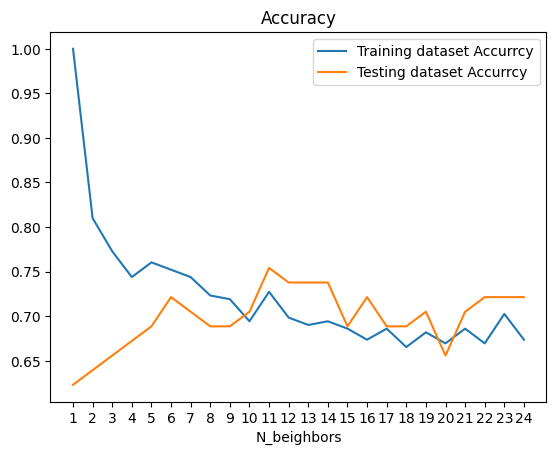

Best k value: 11


In [27]:
#5.2  sử dụng tham só k để dò giá trị K tốt nhất

neighbors=np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# lôp over k Values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    #compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    print(f'k={k}, train accuracy={train_accuracy[i]}, test accuracy={test_accuracy[i]}')
#5.3 vẽ biểu đồ thể hiện độ chính xác của mô hình trên tập train và test
plt.plot(neighbors, train_accuracy, label='Training dataset Accurrcy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accurrcy')
plt.legend()
plt.xticks(np.arange(1, 25),np.arange(1, 25))
plt.xlabel('N_beighbors')
plt.title('Accuracy')
plt.show() 
#5.4 hiển thị giá trị k tốt nhất
best_k = neighbors[np.argmax(test_accuracy)]
print(f'Best k value: {best_k}')

In [28]:
#6. xây dưng lại mô hình với giá trị k tốt nhất
knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(x_train, y_train)

c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [29]:
#7. Hãy cho biết dộ chính xác của mô hình 
print("Train accuracy with best k:", knnModel.score(x_train, y_train))
print("Test accuracy with best k:", knnModel.score(x_test, y_test))

Train accuracy with best k: 0.7272727272727273
Test accuracy with best k: 0.7540983606557377


In [30]:
#8.In ra ds các index của các mẫu trong tập test
# và khảng các từ các hàng xóm đến mẫu đó
distances, indices = knnModel.kneighbors(x_test)
print("Indices of neighbors for each sample in x_test:\n", indices)
#9. In ra khoảng cách từ các mẫu trong tập test đến các hàng xóm
print("Distances to neighbors for each sample in x_test:\n", distances)

Indices of neighbors for each sample in x_test:
 [[  1  79 161 222 211  25 217 166 103 111  88]
 [179 101  89  70 167  92   7 149 114 221 172]
 [195 148 147  34  19 106 176 216 158  98 100]
 [107 191  54 174 144  80 186  87  40   8  61]
 [ 69  64 185 141 192 117  57 139 157 103  78]
 [147 106  34  19  98 241 100 154 229 148 228]
 [ 94  33 197 180   3 237 213   2 236 199 233]
 [101 182 170 204  79 109 161  70   1 179 167]
 [111  78 217  88 222  86  25  69 138  38  58]
 [ 14 187 153 110  75 175 138  57 157 141   6]
 [ 51  98  91 218  65 210 184  35 147 121 228]
 [101 204  70 172 167 179 189 161  89  11 168]
 [ 81  40 131 171 186 209 133 122 132 160 165]
 [ 48 142 158 181 119 176  20  96 183 230  47]
 [  9 140  23  30 108 232 206  90  83  37 126]
 [ 10 223  44 127 116 235  52 237 231 146 162]
 [ 31 146  12 108  83 140 150  82  95  37  90]
 [ 20  48 142 119 151 203  35  59  96 121 194]
 [ 77  25  86  74 163 190  38 222 188  63 114]
 [115  47  20  48  51 158 142 176 230  35 181]
 [177 134  

In [32]:
#9 cho biết sample input trong tập test sẽ lần lượt gần K
#dòng trong tập train tính theo index
# khoảng cách tương đương theo độ đo Euclidean la bao nhiêu
print(indices[0])
print(distances[0])

[  1  79 161 222 211  25 217 166 103 111  88]
[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]


In [33]:
#10 cho biết với một sample input tương ứng
# ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#= [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ gần K hàng xóm nào trong tập train
tdistances, tindices = knnModel.kneighbors([[47,0,0,150,250,0,1,140,1,0.5,1,0,2]])
print("Indices of neighbors for the sample input:\n", tindices)
print("Distances to neighbors for the sample input:\n", tdistances)

Indices of neighbors for the sample input:
 [[168   2 180  11  94  62 172 213  67  66 189]]
Distances to neighbors for the sample input:
 [[16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
  23.09567059 23.23790008 23.89748941 24.4705946  24.58149711]]


In [34]:
#11 xem ds các giá trị của lớp đánh nhãn của biến  output(target)
# nhằm xác định bênh nhân có bệnh không
classes = knnModel.classes_
print("Classes in the target variable:\n", classes)

Classes in the target variable:
 [0. 1.]


In [35]:
#12. xem ds các xác suất của các lớp đánh nhãn  đàu ra
y_test_score = knnModel.predict_proba(x_test)
print("Predicted probabilities for each class in the target variable:\n", y_test_score)

Predicted probabilities for each class in the target variable:
 [[1.         0.        ]
 [0.45454545 0.54545455]
 [0.45454545 0.54545455]
 [0.45454545 0.54545455]
 [0.63636364 0.36363636]
 [0.18181818 0.81818182]
 [0.36363636 0.63636364]
 [0.63636364 0.36363636]
 [0.72727273 0.27272727]
 [0.27272727 0.72727273]
 [0.63636364 0.36363636]
 [0.45454545 0.54545455]
 [0.18181818 0.81818182]
 [0.54545455 0.45454545]
 [0.18181818 0.81818182]
 [0.18181818 0.81818182]
 [0.18181818 0.81818182]
 [0.54545455 0.45454545]
 [0.72727273 0.27272727]
 [0.54545455 0.45454545]
 [0.45454545 0.54545455]
 [0.81818182 0.18181818]
 [0.72727273 0.27272727]
 [0.36363636 0.63636364]
 [0.45454545 0.54545455]
 [0.27272727 0.72727273]
 [0.72727273 0.27272727]
 [0.         1.        ]
 [0.63636364 0.36363636]
 [0.36363636 0.63636364]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [0.09090909 0.90909091]
 [0.54545455 0.45454545]
 [0.63636364 0.36363636]
 [0.18181818 0.81818182]
 [0.0909090

In [36]:
#13 cho biết mẫu input có index=2 trong tập test
# khi đi qua mô dự báo sẽ cho xác suất  dự báo nhãn nào cao hơn và gái trị là bao nhiêu
# còn nhãn thấp là nhãn nào có xác suất bao nhiêu
print(x_test[2])

print("Predicted probabilities for sample input with index=2:", y_test_score[2])

[ 57.    1.    2.  150.  126.    1.    1.  173.    0.    0.2   2.    1.
   3. ]
Predicted probabilities for sample input with index=2: [0.45454545 0.54545455]


In [37]:
#14 liệt kê ds các nhãn dự báo thông qua mô hình của các mẫu dữ liệu trong input trong tập test
# Hãy cho biết kế quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao biêu
y_test_pred = knnModel.predict(x_test)
print("Predicted labels for each sample in x_test:\n", y_test_pred)


Predicted labels for each sample in x_test:
 [0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]


In [38]:
#15 Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold)  đưa ra quyết định là 0.65
# thì kết quả dự báo của mẫu input thứ 2 và mẫu số năm và mẫu số sáu là bao nhiêu
y_pred_test_new_065=(knn.predict_proba(x_test)[:,1] >= 0.65).astype(float)
print("Predicted labels with threshold 0.65 for sample inputs in x_test:\n", y_pred_test_new_065)


Predicted labels with threshold 0.65 for sample inputs in x_test:
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [39]:
#16 hãy đánh giá mô hình trên tập test qua  Confusion Matrix
from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cfmx)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

Confusion Matrix:
 [[20  9]
 [ 6 26]]
True Negatives: 20, False Positives: 9, False Negatives: 6, True Positives: 26


In [40]:
#19 hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

